In [2]:
import numpy as np
import matplotlib.pyplot as plt
import statistics as stat
import matplotlib.cm as cm
from scipy.optimize import curve_fit
from scipy.stats import norm
from scipy.special import erfc
from scipy.integrate import simpson
from scipy.stats import lognorm
import importlib
import os
import basicfunc as bf

importlib.reload(bf)

<module 'basicfunc' from 'c:\\Users\\Utente\\Desktop\\uni\\MAGISTRALE\\ESAMI\\FATTI\\radioactivity\\lab_infn\\basicfunc.py'>

In [3]:
ch1_x = np.loadtxt('picchi_ch1.txt', usecols=1)
ch1_y = np.loadtxt('picchi_ch1.txt', usecols=0)
ch2_x = np.loadtxt('picchi_ch2.txt', usecols=1)
ch2_y = np.loadtxt('picchi_ch2.txt', usecols=0)

In [4]:
calibration_ch1 = bf.linear(ch1_x, ch1_y*0.128, sx=1/ch1_x, xlabel='ADC channels', ylabel='Voltage [mV]', titolo='Calibration channel 1', plot=False, save=False) #sx=1/ch1_x,
print('___________________________________________________________-----')
calibration_ch2 = bf.linear(ch2_x, ch2_y*0.128, sx=1/ch2_x, xlabel='ADC channels', ylabel='Voltage [mV]', titolo='Calibration channel 2', plot=False, save=False) #sx=1/ch2_x,

This fit returns a list which contains, in order:
- A numpy array with the parameters
- A numpy array with the uncertainties
- A numpy array with the residuals
- The chi squared
- The reduced chi squared 

Optimised parameters
-----------------------------------------------
m = 0.0016263004309821903 ± 9.581806788430196e-09
q = -0.01748063842507166 ± 0.00012170499144859884
Chi-squared = 20679.57215724887
Reduced chi-squared = 1590.7363197883747
___________________________________________________________-----
This fit returns a list which contains, in order:
- A numpy array with the parameters
- A numpy array with the uncertainties
- A numpy array with the residuals
- The chi squared
- The reduced chi squared 

Optimised parameters
-----------------------------------------------
m = 0.047555098516250116 ± 9.31990825122541e-09
q = -0.8464180269098197 ± 0.00011866413621853061
Chi-squared = 6830241.024061022
Reduced chi-squared = 525403.1556970017


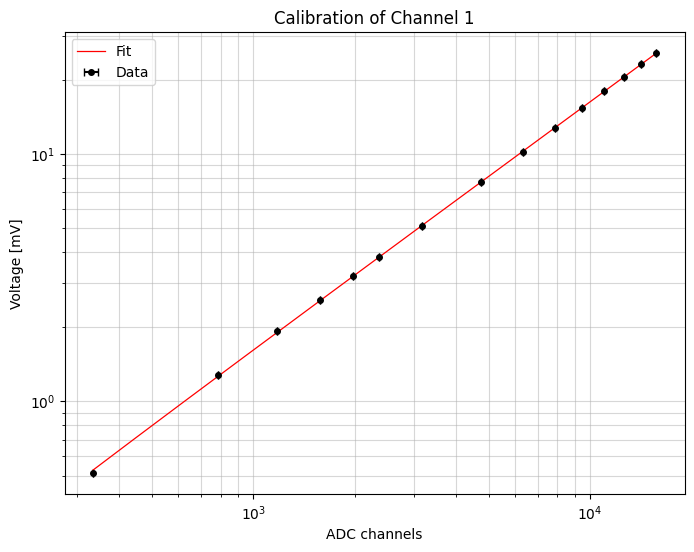

In [5]:
plt.figure(figsize=(8, 6))
x1_fit = np.linspace(ch1_x.min(), ch1_x.max(), 10000)
plt.errorbar(ch1_x, ch1_y*0.128, xerr=(1/ch1_x), fmt='o', markersize=4, capsize=3, label='Data', color='black')
plt.loglog(x1_fit, bf.retta(x1_fit, calibration_ch1[0][0], calibration_ch1[0][1]), label='Fit', color='red', lw=0.9)
plt.xlabel('ADC channels')
plt.ylabel('Voltage [mV]')
plt.title('Calibration of Channel 1')
plt.legend()
plt.grid(alpha=0.5, which='both')
plt.savefig('grafici/calibration_ch1_log.pdf', dpi=300)
plt.show()

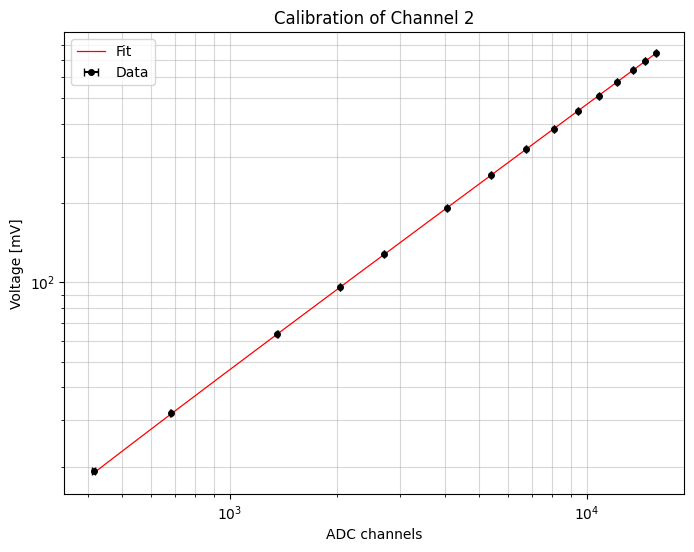

In [6]:
plt.figure(figsize=(8, 6))
x2_fit = np.linspace(ch2_x.min(), ch2_x.max(), 10000)
plt.errorbar(ch2_x, ch2_y*0.128, xerr=3, fmt='o', markersize=4, capsize=3, label='Data', color='black')
plt.loglog(x2_fit, bf.retta(x2_fit, calibration_ch2[0][0], calibration_ch2[0][1]), label='Fit', color='red', lw=0.9)
plt.xlabel('ADC channels')
plt.ylabel('Voltage [mV]')
plt.title('Calibration of Channel 2')
plt.legend()
plt.grid(alpha=0.5, which='both')
plt.savefig('grafici/calibration_ch2_log.pdf', dpi=300)
plt.show()

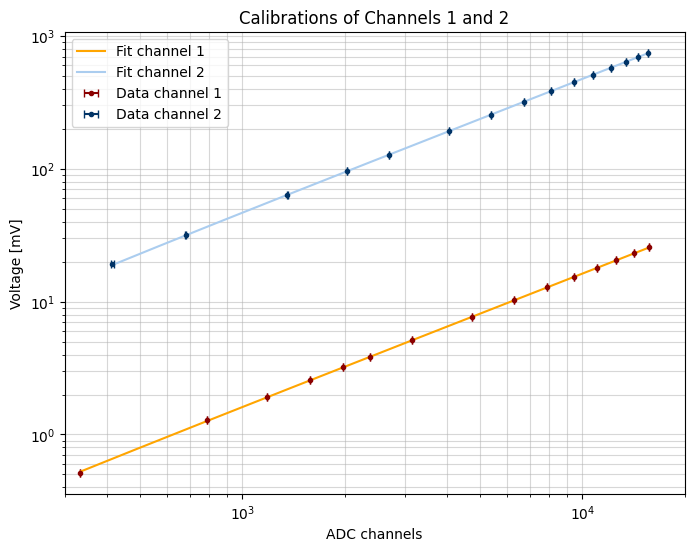

In [7]:
plt.figure(figsize=(8, 6))
plt.errorbar(ch1_x, ch1_y*0.128, xerr=(1/ch1_x), fmt='o', markersize=3, capsize=3, color='#8b0000', label='Data channel 1')
plt.loglog(x1_fit, bf.retta(x1_fit, calibration_ch1[0][0], calibration_ch1[0][1]), color='#FFA500', label='Fit channel 1')
plt.errorbar(ch2_x, ch2_y*0.128, xerr=3, fmt='o', markersize=3, capsize=3, color='#003366', label='Data channel 2')
plt.loglog(x2_fit, bf.retta(x2_fit, calibration_ch2[0][0], calibration_ch2[0][1]), color='#abcdef', label='Fit channel 2')
plt.xlabel('ADC channels')
plt.ylabel('Voltage [mV]')
plt.title('Calibrations of Channels 1 and 2')
plt.legend()
plt.xlim(300, 20000)
plt.grid(alpha=0.5, which='both')
plt.savefig('grafici/calibration_ch1_ch2_log.pdf', dpi=300)
plt.show()

In [8]:
# Caricamento dati
data1 = np.loadtxt('Mini-TEPC/gamma_820V_finale_ch1 copy.Spe')
data2 = np.loadtxt('Mini-TEPC/gamma_820V_finale_ch2 copy.Spe')

# Calibrazione asse delle ascisse
arr1 = np.arange(len(data1)) * calibration_ch1[0][0] + calibration_ch1[0][1]
arr2 = np.arange(len(data2)) * calibration_ch2[0][0] + calibration_ch2[0][1]

# Larghezza dei bin
wid1 = arr1[1] - arr1[0]
wid2 = arr2[1] - arr2[0]

# Aggiunta bordo finale per step
edges1 = np.append(arr1, arr1[-1] + wid1)
edges2 = np.append(arr2, arr2[-1] + wid2)

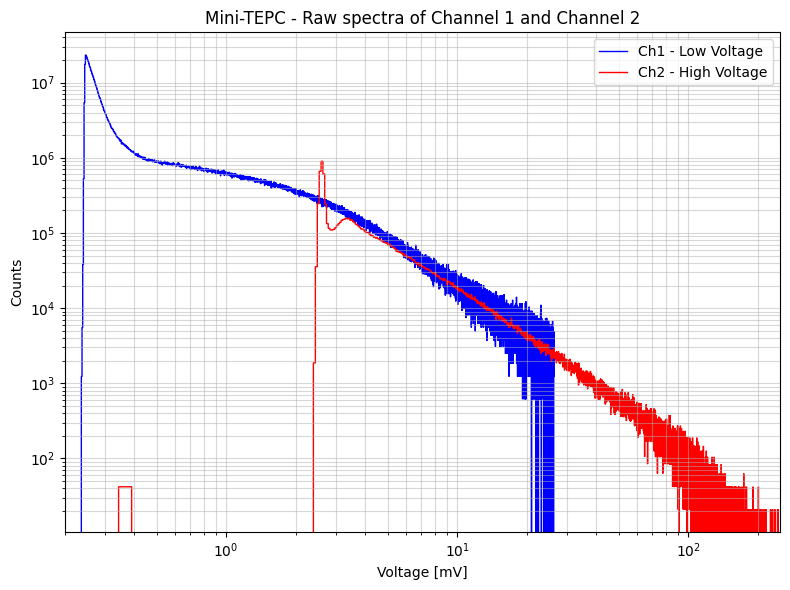

In [9]:
plt.figure(figsize=(8, 6))
plt.grid(alpha=0.5, which='both')
plt.stairs(data1/(calibration_ch1[0][0]), edges1, color='blue', label='Ch1 - Low Voltage',)
plt.stairs(data2/(calibration_ch2[0][0]), edges2, color='red', label='Ch2 - High Voltage',)
plt.xlabel('Voltage [mV]')
plt.ylabel('Counts')
plt.title('Mini-TEPC - Raw spectra of Channel 1 and Channel 2')
plt.legend(loc='upper right')
plt.xlim(0.2, 250)
plt.yscale('log')
plt.xscale('log')
plt.tight_layout()
plt.savefig('grafici/spettro_ch1_ch2.pdf', dpi=300)
plt.show()

In [10]:
# Rebinning dei dati in bin logaritmici 

def get_log_bins(start_exp, stop_exp, N=60):
    """
    Crea i bordi dei bin logaritmici tra 10^start_exp e 10^stop_exp
    con un dato numero di bin per decade.
    
    Restituisce un array con i bordi dei bin.
    """
    total_bins = int((stop_exp - start_exp) * N)
    x = np.linspace(start_exp, stop_exp, total_bins + 1)
    edges = 10 ** x
    return edges

# Intervallo logaritmico da min a max (evita 0, prende positivo più piccolo)
vmin = min(np.min(arr1[arr1 > 0]), np.min(arr2[arr2 > 0]))
vmax = max(np.max(arr1), np.max(arr2))

# Esponenti per intervallo log10
start_exp = np.floor(np.log10(vmin))
stop_exp = np.ceil(np.log10(vmax))

# Ottieni bordi logaritmici
log_edges = get_log_bins(start_exp, stop_exp, N=60)
log_centers = (log_edges[:-1] + log_edges[1:]) / 2

# Rebinning dei dati
rebinned1, _ = np.histogram(arr1, bins=log_edges, weights=data1)
rebinned2, _ = np.histogram(arr2, bins=log_edges, weights=data2)

rebinned1_norm = rebinned1 / rebinned1.max()
rebinned2_norm = rebinned2 / rebinned1.max()




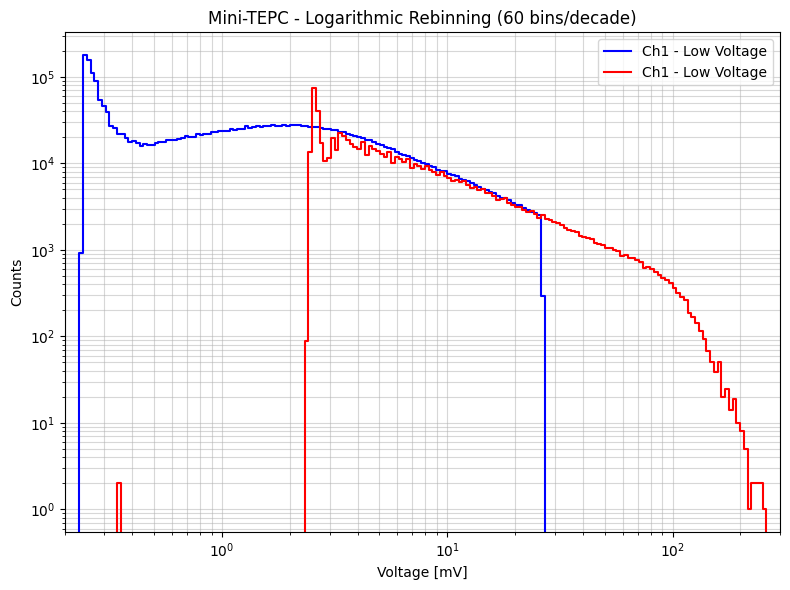

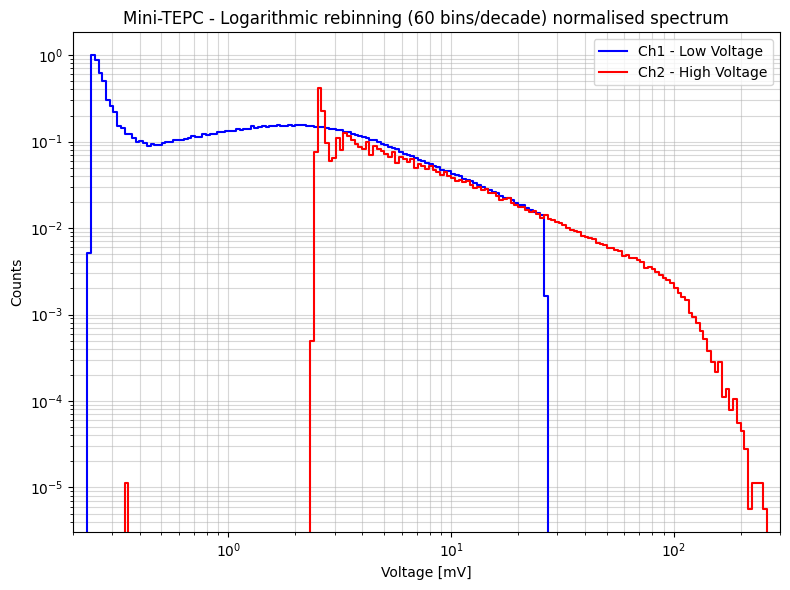

In [11]:
plt.figure(figsize=(8, 6))
plt.step(log_centers, rebinned1, where='mid', label='Ch1 - Low Voltage', color='blue') #/(calibration_ch1[0][0])
plt.step(log_centers, rebinned2, where='mid', label='Ch1 - Low Voltage', color='red') #/(calibration_ch1[0][0])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Voltage [mV]')
plt.ylabel('Counts')
plt.title('Mini-TEPC - Logarithmic Rebinning (60 bins/decade)')
plt.grid(which='both', alpha=0.5)
plt.legend()
plt.xlim(0.2, 300)
plt.tight_layout()
plt.savefig('grafici/spettro_log_rebinned.pdf', dpi=300)
plt.show()

plt.figure(figsize=(8, 6))
plt.step(log_centers, rebinned1_norm, where='mid', label='Ch1 - Low Voltage', color='blue')
plt.step(log_centers, rebinned2_norm, where='mid', label='Ch2 - High Voltage', color='red')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Voltage [mV]')
plt.ylabel('Counts')
plt.title('Mini-TEPC - Logarithmic rebinning (60 bins/decade) normalised spectrum')
plt.grid(which='both', alpha=0.5)
plt.legend()
plt.xlim(0.2, 300)
plt.tight_layout()
# plt.savefig('grafici/spettro_log_rebinned_normalised.pdf', dpi=300)
plt.show()


In [12]:
# Trova l'ultima posizione non zero in rebinned1
last_nonzero_index = np.nonzero(rebinned1)[0][-2]

# Parte iniziale da rebinned1 (fino all'ultima posizione non zero inclusa)
part1 = rebinned1[:last_nonzero_index + 1]

# Parte restante da rebinned2 (dalla posizione successiva in poi)
part2 = rebinned2[last_nonzero_index + 1:]

# Crea l'array finale concatenando le due parti
finale = np.concatenate((part1, part2))

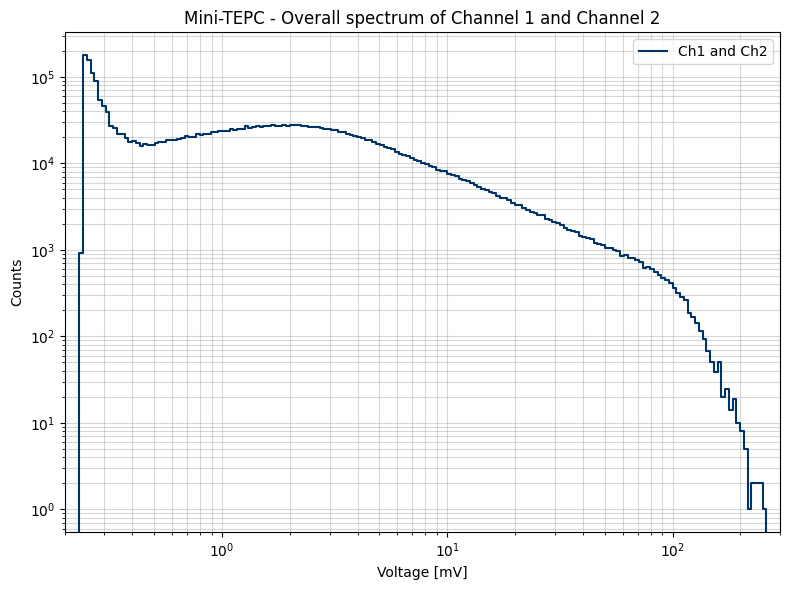

In [13]:
plt.figure(figsize=(8, 6))
plt.step(log_centers, finale, where='mid', label='Ch1 and Ch2', color='#003366')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Voltage [mV]')
plt.ylabel('Counts')
plt.title('Mini-TEPC - Overall spectrum of Channel 1 and Channel 2')
plt.grid(which='both', alpha=0.5)
plt.legend()
plt.xlim(0.2, 300)
plt.tight_layout()
plt.savefig('grafici/spettro_unico_rebinned.pdf', dpi=300)
plt.show()

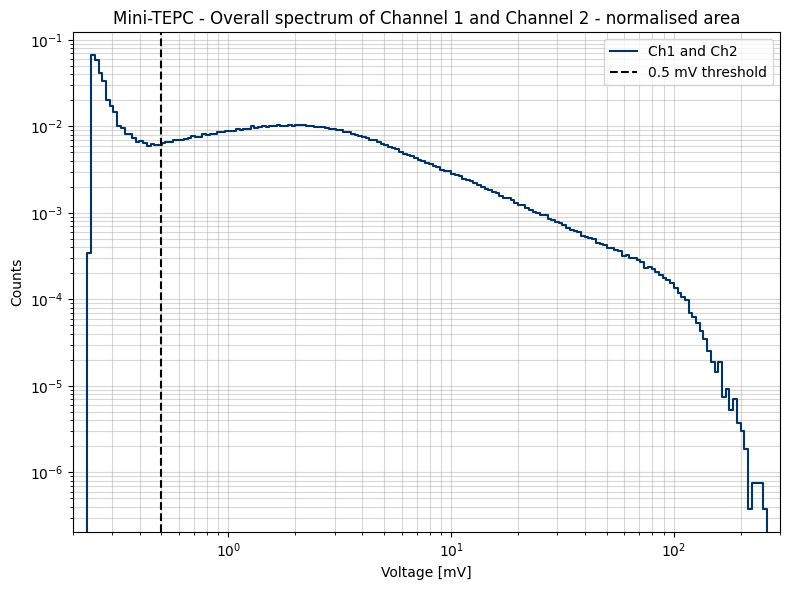

In [14]:
integral = np.sum(finale)#, log_centers)

normalised = finale / integral

plt.figure(figsize=(8, 6))
plt.step(log_centers, normalised, where='mid', label='Ch1 and Ch2', color='#003366')
plt.axvline(x=0.5, color='black', linestyle='--', label='0.5 mV threshold')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Voltage [mV]')
plt.ylabel('Counts')
plt.title('Mini-TEPC - Overall spectrum of Channel 1 and Channel 2 - normalised area')
plt.grid(which='both', alpha=0.5)
plt.legend()
plt.xlim(0.2, 300)
plt.tight_layout()
plt.savefig('grafici/spettro_unico_norm.pdf', dpi=300)
plt.show()

In [15]:
h = log_centers[log_centers>=0.5]
nh = finale[log_centers>=0.5]
delta_h = log_edges[1:][log_centers>=0.5] - log_edges[:-1][log_centers>=0.5]
N = np.sum(nh)

fh = nh/(delta_h*N) #l'integrale di fh è 1
 
hF = np.trapezoid(h*fh, h)

dh = h*fh/hF #l'integrale di dh è 1


In [16]:
# plt.figure(figsize=(8, 6))
# plt.step(h, dh, where='mid', label='Ch1 and Ch2', color='#003366')
# plt.xscale('log')
# # plt.yscale('log')
# plt.xlabel('Voltage [mV]')
# plt.ylabel('d(h)')
# plt.title('TEPC - $\it{d(h)}$ distribution')
# plt.grid(which='both', alpha=0.5)
# plt.legend()
# plt.xlim(0.45, 450)
# plt.tight_layout()
# plt.savefig('grafici/distribuzione_dh.pdf', dpi=300)
# plt.show()

<>:7: SyntaxWarning: invalid escape sequence '\i'
<>:7: SyntaxWarning: invalid escape sequence '\i'
C:\Users\Utente\AppData\Local\Temp\ipykernel_13752\889111291.py:7: SyntaxWarning: invalid escape sequence '\i'
  plt.title('Mini-TEPC - $\it{d(h)}$ distribution - normalised area')


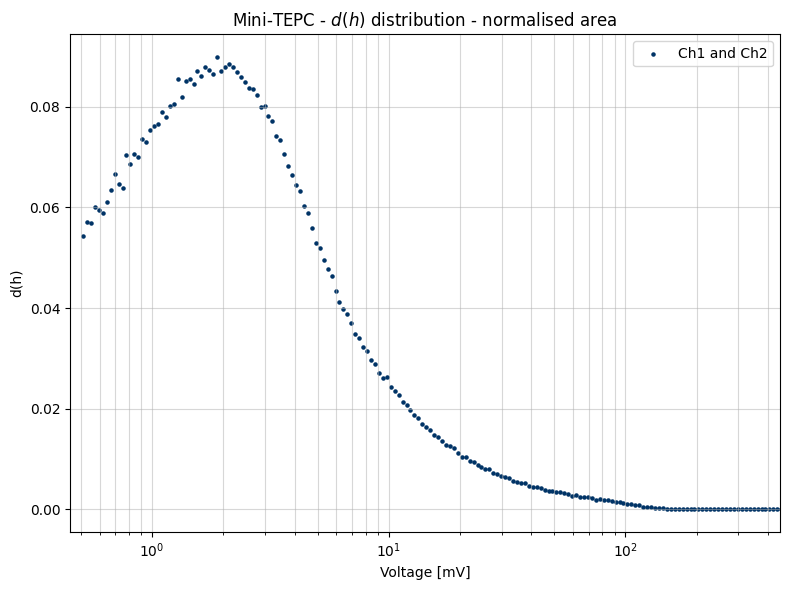

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(h, dh, label='Ch1 and Ch2', color='#003366', s=5) #/(calibration_ch1[0][0])
plt.xscale('log')
# plt.yscale('log')
plt.xlabel('Voltage [mV]')
plt.ylabel('d(h)')
plt.title('Mini-TEPC - $\it{d(h)}$ distribution - normalised area')
plt.grid(which='both', alpha=0.5)
plt.legend()
plt.xlim(0.45, 450)
plt.tight_layout()
plt.savefig('grafici/dh_distribution.pdf', dpi=300)
plt.show()

SIOGMID FIT:
Fit parameters:
  A = 0.1855
  B = 0.04874
  C = 113.1
_________________________________________________________________
Chi quadro: 0.0008289484
Gradi di libertà: 44
Chi quadro ridotto: 0.0000188397
_________________________________________________________________
_________________________________________________________________


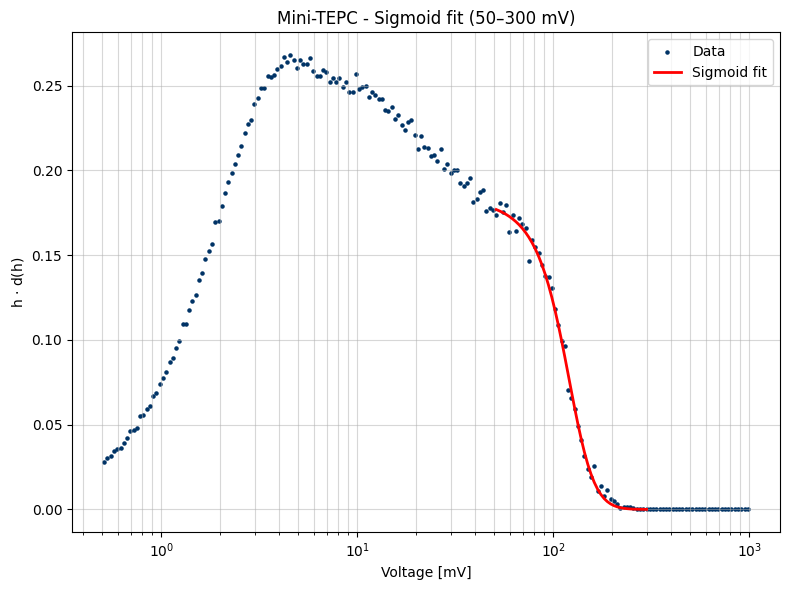

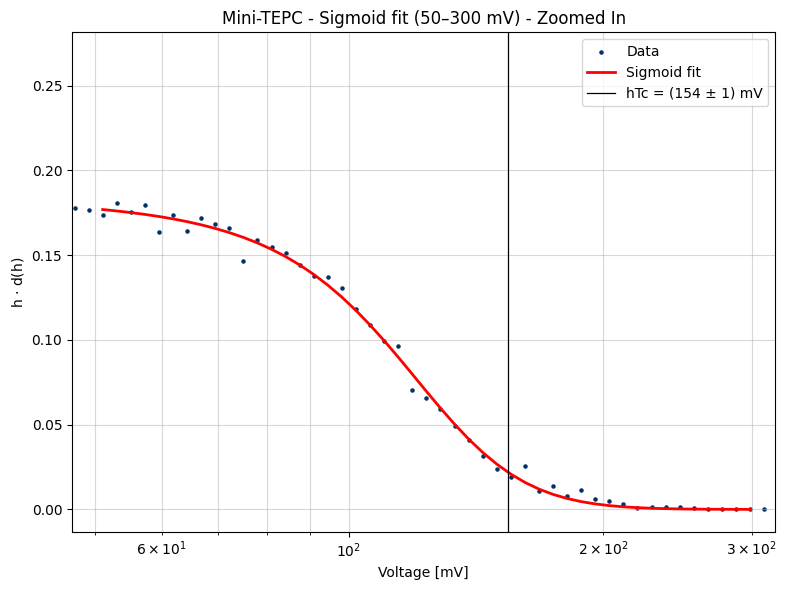

In [18]:
# Definizione della sigmoide con i parametri richiesti
def sigmoid(x, A, B, C):
    return A / (1 + np.exp(B * (x - C)))

# Maschera per selezionare i dati tra 60 e 200 mV
mask = (h >= 50) & (h <= 300)
x_data = h[mask]
y_data = (dh*h)[mask]

# Fit con stima iniziale dei parametri (A, B, C)
p0 = [0.4, -0.05, 170]  # A = massimo valore di y, B negativo per decrescente, C vicino al centro
popt, pcov = curve_fit(sigmoid, x_data, y_data, p0=p0)

A_err, B_err, C_err = np.sqrt(np.diag(pcov))

#calcolo del chi quadro
y_model = sigmoid(x_data, *popt)
sigma = 1  # errore costante arbitrario
chi_squared = np.sum(((y_data - y_model) / sigma) ** 2)
dof = len(y_data) - len(popt)
chi_squared_reduced = chi_squared / dof

# Stampa dei parametri trovati
print(f'SIOGMID FIT:')
print(f"Fit parameters:\n  A = {popt[0]:.4g}\n  B = {popt[1]:.4g}\n  C = {popt[2]:.4g}")
print('_________________________________________________________________')
print(f"Chi quadro: {chi_squared:.10f}")
print(f"Gradi di libertà: {dof}")
print(f"Chi quadro ridotto: {chi_squared_reduced:.10f}")
print('_________________________________________________________________')
print('_________________________________________________________________')

######################################################################################################################

# Plot dei dati originali e del fit
plt.figure(figsize=(8, 6))
plt.scatter(h, dh*h, label='Data', color='#003366', s=5)
plt.plot(x_data, sigmoid(x_data, *popt), 'r-', label='Sigmoid fit', linewidth=2)
plt.xscale('log')
plt.xlabel('Voltage [mV]')
plt.ylabel(r'h $\cdot$ d(h)')
plt.title('Mini-TEPC - Sigmoid fit (50–300 mV)')
plt.grid(which='both', alpha=0.5)
plt.legend()
# plt.xlim(50, 300)
plt.tight_layout()
plt.savefig('grafici/sigmoid_fit.pdf', dpi=300)
plt.show()

hTc = 2/popt[1] + popt[2]
hTc_err = np.sqrt(4/popt[1]**2 *B_err**2 + C_err**2)


plt.figure(figsize=(8, 6))
plt.scatter(h, dh*h, label='Data', color='#003366', s=5)
plt.plot(x_data, sigmoid(x_data, *popt), 'r-', label='Sigmoid fit', linewidth=2)
plt.axvline(hTc, color='black', linestyle='-', label=f'hTc = ({hTc:.0f} ± 1) mV', lw=0.9)
# plt.axhline(y_hTc, color='orange', linestyle='--', label=f'y(hTc) = {y_hTc:.4g}')
plt.xlim(47, 320)
plt.xscale('log')
plt.xlabel('Voltage [mV]')
plt.ylabel(r'h $\cdot$ d(h)')
plt.title('Mini-TEPC - Sigmoid fit (50–300 mV) - Zoomed In')
plt.grid(which='both', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.savefig('grafici/sigmoid_fit_zoom.pdf', dpi=300)
plt.show()


In [19]:
hTc = 2/popt[1] + popt[2]
hTc_err = np.sqrt(4/popt[1]**2 *B_err**2 + C_err**2)
print('hTc:', hTc, '±', hTc_err, 'mV')
y_conv = 15.5 #kev mum-1
a = y_conv/ hTc
a_err = 15.5 * hTc_err / hTc**2
print('Coefficiente di conversione:', a, '±', a_err, 'kev mum-1')

y = h*a #kev mum-1
fy = fh/a #kev-1 mum
k = np.trapezoid(fy, y) #l'integrale di fy è 1

mask_a = (y>=y.min())
y_mask = y[mask_a]
fy_mask = fy[mask_a]

hTc: 154.1291839632337 ± 1.0119533135276517 mV
Coefficiente di conversione: 0.10056499101232771 ± 0.0006602712949163429 kev mum-1


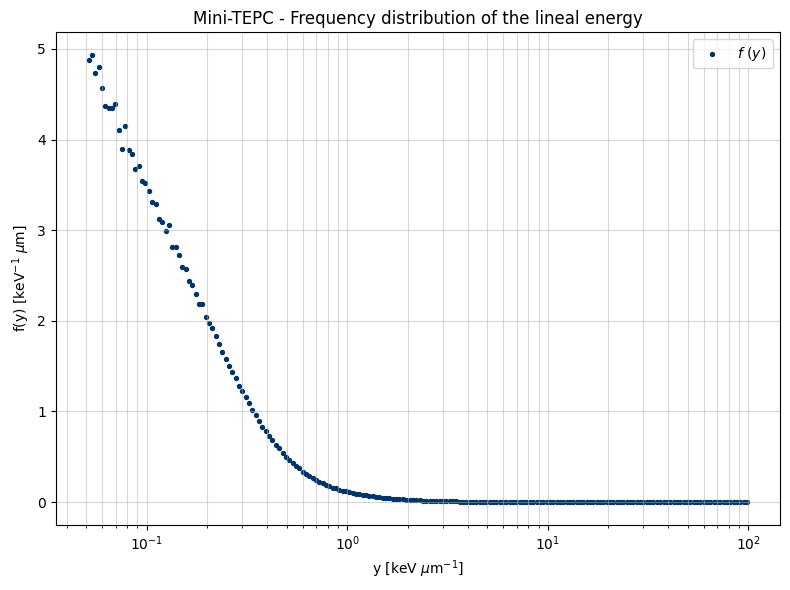

In [26]:
plt.figure(figsize=(8, 6))
plt.scatter(y_mask, fy_mask, label=r'$\it{f~(y)}$ ', color='#003366', s=8)
plt.xscale('log')
plt.xlabel(r'y [keV $\mu$m$^{-1}$]')
plt.ylabel(r'f(y) [keV$^{-1}$ $\mu$m]')
plt.title('Mini-TEPC - Frequency distribution of the lineal energy')
plt.grid(which='both', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.savefig('grafici/frequency_distribution_lineal_energy.pdf', dpi=300)
plt.show()


Parametri fit: 
sigma = 1.0107 +/- 0.011999954539796723, 
scale = 0.1306 +/- 0.0022454675564276185, 
A = 5.8458 +/- 0.06740926534576809
_________________________________________________________________
Chi2 = 0.35
ndof = 195
Chi2/ndof = 0.00
_________________________________________________________________
_________________________________________________________________


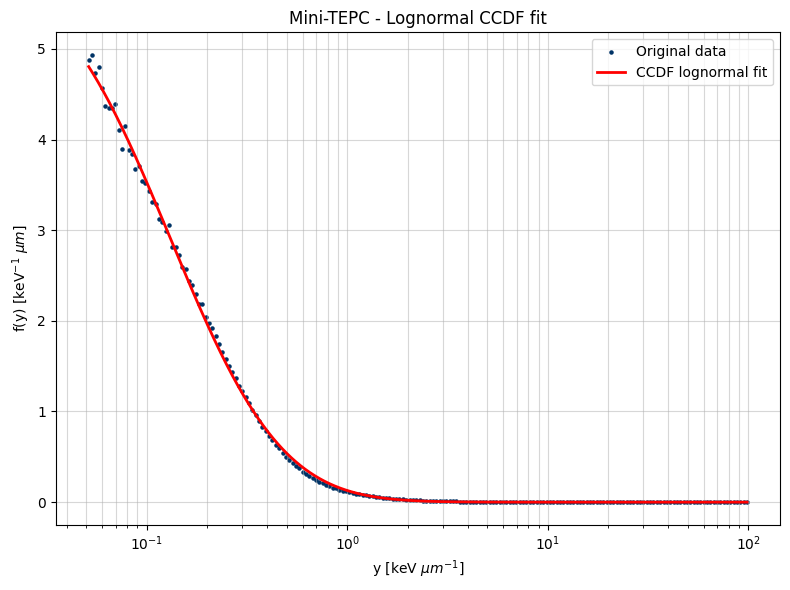

In [21]:
# Funzione CCDF lognormale da fit
def ccdf_lognorm(y, s, scale, A):
    # s = sigma, scale = exp(mu)
    # lognorm.cdf(y, s, scale) è la CDF; prendiamo il complementare
    return A*(1 - lognorm.cdf(y, s=s, scale=scale))


p0 = [0.533, 0.0559, 5]
params, covariance = curve_fit(ccdf_lognorm, y_mask, fy_mask, p0=p0)

fy_fit = ccdf_lognorm(y_mask, *params)
chi2_val = np.sum(((fy_mask - fy_fit) / 1) ** 2)
ndof = len(y_mask) - len(params)

# chi2/ndof
chi2_red = chi2_val / ndof

s_fit, scale_fit, A_fit = params
s_fit_err, scale_fit_err, A_fit_err = np.sqrt(np.diag(covariance))
print(f"Parametri fit: \nsigma = {s_fit:.4f} +/- {s_fit_err}, \nscale = {scale_fit:.4f} +/- {scale_fit_err}, \nA = {A_fit:.4f} +/- {A_fit_err}")
print('_________________________________________________________________')
print(f"Chi2 = {chi2_val:.2f}")
print(f"ndof = {ndof}")
print(f"Chi2/ndof = {chi2_red:.2f}")
print('_________________________________________________________________')
print('_________________________________________________________________')

y_fit = np.linspace(min(y_mask), max(y_mask), 100000)
fy_fit = ccdf_lognorm(y_fit, s_fit, scale_fit, A_fit)
# Grafico
plt.figure(figsize=(8, 6))
plt.scatter(y_mask, fy_mask, color='#003366', s=5, label='Original data')
plt.plot(y_fit, fy_fit, color='red', lw=2, label='CCDF lognormal fit')
plt.xscale('log')
# plt.xlim(0, 2)
plt.xlabel(r'y [keV $\mu m^{-1}$]')
plt.ylabel(r'f(y) [keV$^{-1}$ $\mu m$]')
plt.title("Mini-TEPC - Lognormal CCDF fit")
plt.legend()
plt.grid(which='both', alpha=0.5)
plt.tight_layout()
plt.savefig('grafici/ccdf_lognorm_fit.pdf', dpi=300)
plt.show()

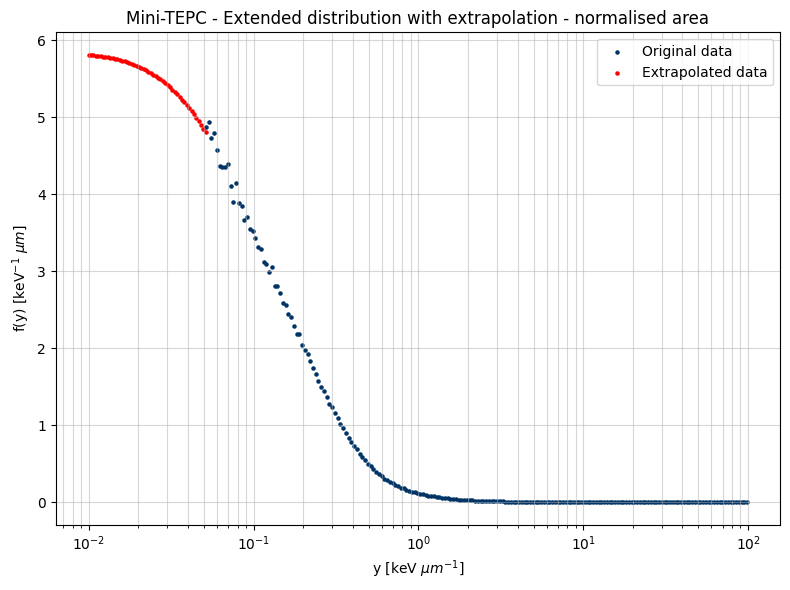

In [22]:
y_left = np.logspace(np.log10(0.01), np.log10(y_mask.min()), 50)
fy_left = ccdf_lognorm(y_left, s_fit, scale_fit, A_fit)

y_extended = np.concatenate([y_left, y_mask])
fy_extended = np.concatenate([fy_left, fy_mask])

integral_fy = np.trapezoid(fy_extended, y_extended)
fy_extended_normalized = fy_extended / integral_fy
integral_fynorm = np.trapezoid(fy_extended_normalized, y_extended)

plt.figure(figsize=(8,6))
# plt.scatter(y_extended, fy_extended_normalized, color='red', s=5, label='Extended distribution - normalised')
# plt.scatter(y_extended, fy_extended, color='black', s=3, alpha=0.5, label='Extended distribution')
plt.scatter(y_mask, fy_mask, color='#003366', s=5,  label='Original data')
plt.scatter(y_left, fy_left, color='red', s=5, label='Extrapolated data')
plt.xscale('log')
plt.xlabel(r'y [keV $\mu m^{-1}$]')
plt.ylabel(r'f(y) [keV$^{-1}$ $\mu m$]')
plt.legend()
plt.title('Mini-TEPC - Extended distribution with extrapolation - normalised area')
plt.grid(True, which='both', alpha=0.5)
plt.tight_layout()
plt.savefig('grafici/distribuzione_estesa_extrapolata.pdf', dpi=300)
plt.show()


In [23]:
print('TEPC - yF e yD ')
yF = np.trapezoid(y_extended * fy_extended_normalized, y_extended)
print(f"yF = {yF} keV mum⁻¹")

dy = (y_extended * fy_extended_normalized)/yF

int_dy = np.trapezoid(dy, y_extended) #fa 1

yD = np.trapezoid(dy * y_extended, y_extended)
print(f"yD = {yD} keV mum⁻¹")

TEPC - yF e yD 
yF = 0.3863041099201754 keV mum⁻¹
yD = 2.220958203326169 keV mum⁻¹


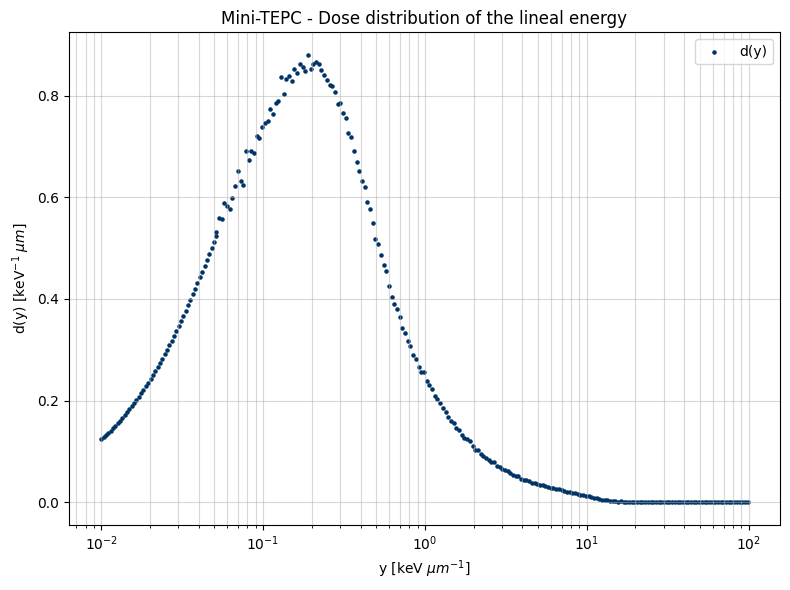

In [24]:
plt.figure(figsize=(8, 6))
plt.scatter(y_extended, dy, color='#003366', s=5, label='d(y)')
plt.xscale('log')
plt.xlabel(r'y [keV $\mu m^{-1}$]')
plt.ylabel(r'd(y) [keV$^{-1}$ $\mu m$]')
plt.legend()
plt.title('Mini-TEPC - Dose distribution of the lineal energy')
plt.grid(True, which='both', alpha=0.5)
plt.tight_layout()
plt.savefig('grafici/dy_distribution.pdf', dpi=300)
plt.show()

In [25]:
# x = np.linspace(0.01, 100, 1000)
# m = -4
# q = 7
# y = m*x +q
# plt.plot(x, y, color='black', label='y = 4x + 7', lw=0.9)
# plt.xscale('log')
# plt.show()